In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop("Serial No.",axis=1, inplace = True)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 8)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop("Chance of Admit ",axis=1)
y= df["Chance of Admit "]

In [8]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=15)

In [9]:
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

x_train = scale.fit_transform(x_train)

x_test = scale.transform(x_test)

In [10]:
x_train[1]

array([0.57850047, 0.45828956, 0.79240582, 0.63288482, 1.62496346,
       0.5161466 , 0.90453403])

In [11]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential 
from keras.layers import Dense

2025-07-06 06:23:23.639747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751783003.915131      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751783003.994907      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
model = Sequential()

model.add(Dense(12,activation='relu',input_dim=7))

model.add(Dense(10,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-06 06:23:39.506163: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="mean_squared_error", optimizer='Adam', metrics=['r2_score'])


In [15]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2304 - r2_score: -10.3831 - val_loss: 0.1548 - val_r2_score: -7.4143
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1536 - r2_score: -6.3020 - val_loss: 0.1119 - val_r2_score: -5.0805
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1143 - r2_score: -4.2127 - val_loss: 0.0859 - val_r2_score: -3.6668
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0889 - r2_score: -3.7267 - val_loss: 0.0656 - val_r2_score: -2.5667
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0671 - r2_score: -2.3614 - val_loss: 0.0497 - val_r2_score: -1.7021
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0527 - r2_score: -1.7744 - val_loss: 0.0387 - val_r2_score: -1.1004
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0442 - r2_score: -1.0365 - val_loss: 0.0302 - val_r2_score: -0.6412
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331 - r2_score: -0.6647 - 

In [16]:
y_pre = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [17]:
y_pre

array([[0.56057477],
       [0.6298566 ],
       [0.6394259 ],
       [0.61849463],
       [0.6934129 ],
       [0.86087275],
       [0.60460424],
       [0.6675186 ],
       [0.8072778 ],
       [0.80980015],
       [0.75591445],
       [0.7185137 ],
       [0.9050952 ],
       [0.5908751 ],
       [0.7129848 ],
       [0.8901874 ],
       [0.8946004 ],
       [0.79937863],
       [0.7738793 ],
       [0.6528208 ],
       [0.7961718 ],
       [0.7205198 ],
       [0.5820141 ],
       [0.7277297 ],
       [0.7815249 ],
       [0.8004929 ],
       [0.8708453 ],
       [0.91452897],
       [0.6809429 ],
       [0.8850815 ],
       [0.633695  ],
       [0.6474608 ],
       [0.6644536 ],
       [0.5941806 ],
       [0.71944237],
       [0.6112839 ],
       [0.9005568 ],
       [0.7523836 ],
       [0.39380115],
       [0.6295705 ],
       [0.6050365 ],
       [0.93510807],
       [0.7097938 ],
       [0.9218446 ],
       [0.64057267],
       [0.7609929 ],
       [0.71265674],
       [0.562

In [18]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pre)

score

0.7377123445904434

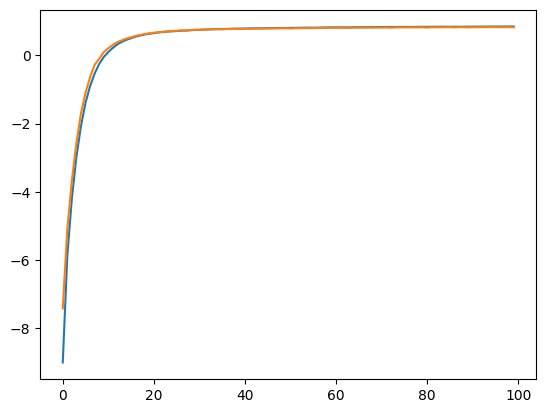

In [19]:
import  matplotlib.pyplot as plt 

plt.plot(history.history["r2_score"])
plt.plot(history.history["val_r2_score"])